# **Image Classification using Iris Flower Dataset**

## **Importing necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from warnings import filterwarnings
filterwarnings(action='ignore')

## **Importing iris flower dataset**

In [9]:
from urllib.request import urlretrieve
iris = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
urlretrieve(iris)
df = pd.read_csv(iris, sep=',')
attributes = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
df.columns = attributes
print(df.head(10))

   sepal_length  sepal_width  petal_length  petal_width        class
0           4.9          3.0           1.4          0.2  Iris-setosa
1           4.7          3.2           1.3          0.2  Iris-setosa
2           4.6          3.1           1.5          0.2  Iris-setosa
3           5.0          3.6           1.4          0.2  Iris-setosa
4           5.4          3.9           1.7          0.4  Iris-setosa
5           4.6          3.4           1.4          0.3  Iris-setosa
6           5.0          3.4           1.5          0.2  Iris-setosa
7           4.4          2.9           1.4          0.2  Iris-setosa
8           4.9          3.1           1.5          0.1  Iris-setosa
9           5.4          3.7           1.5          0.2  Iris-setosa


In [5]:
print(df.shape)

(149, 5)


In [6]:
print(df.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    149.000000   149.000000    149.000000   149.000000
mean       5.848322     3.051007      3.774497     1.205369
std        0.828594     0.433499      1.759651     0.761292
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.400000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


## **Dataset visualization**

In [14]:
n = len(df[df['class'] == 'Iris-setosa'])
print("No of Setosa in Dataset:",n)

No of Setosa in Dataset: 49


In [12]:
n = len(df[df['class'] == 'Iris-virginica'])
print("No of Virginica in Dataset:",n)

No of Virginica in Dataset: 50


In [13]:
n = len(df[df['class'] == 'Iris-versicolor'])
print("No of Versicolor in Dataset:",n)

No of Versicolor in Dataset: 50


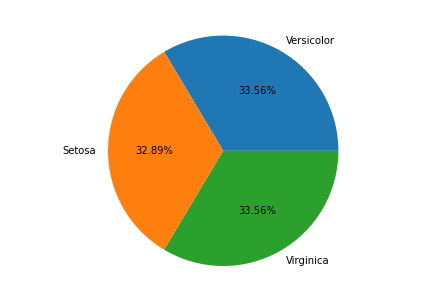

In [15]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Versicolor', 'Setosa', 'Virginica']
s = [50,49,50]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

## **Checking outliers**

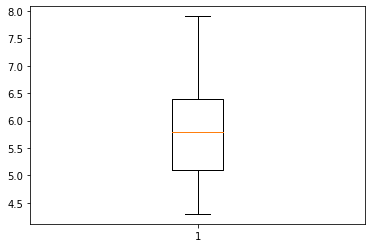

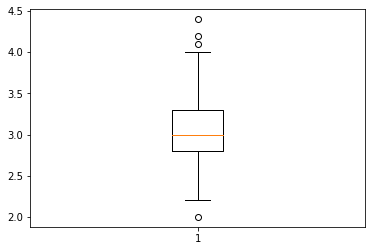

In [17]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.boxplot([df['sepal_length']])
plt.figure(2)
plt.boxplot([df['sepal_width']])
plt.show()

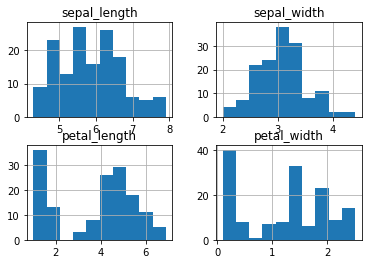

In [21]:
df.hist()
plt.show()

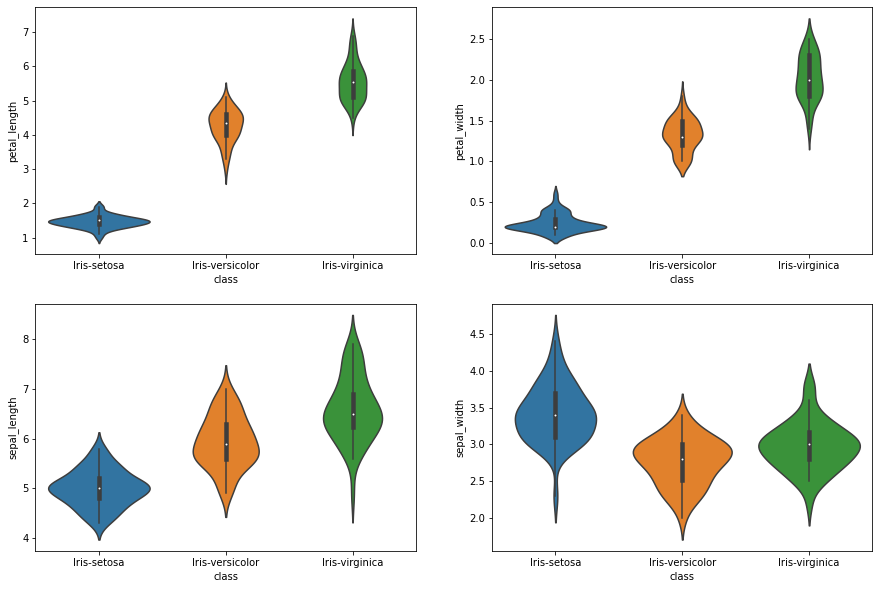

In [22]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='class',y='petal_length',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='class',y='petal_width',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='class',y='sepal_length',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='class',y='sepal_width',data=df)

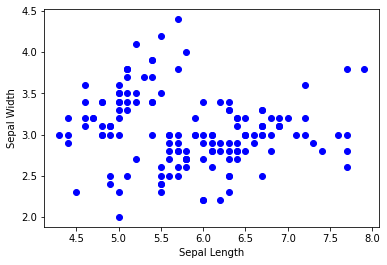

In [25]:
X = df['sepal_length'].values.reshape(-1,1)
Y = df['sepal_width'].values.reshape(-1,1)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.scatter(X,Y,color='b')
plt.show()

In [26]:
#Correlation 
corr_mat = df.corr()
print(corr_mat)

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.103784      0.871283     0.816971
sepal_width      -0.103784     1.000000     -0.415218    -0.350733
petal_length      0.871283    -0.415218      1.000000     0.962314
petal_width       0.816971    -0.350733      0.962314     1.000000


## **Training**

**Importing models**

In [37]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

**Train-test split**

In [38]:
train, test = train_test_split(df, test_size = 0.3)
print(train.shape)
print(test.shape)

(104, 5)
(45, 5)


In [39]:
train_X = train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
train_y = train[['class']]
test_X = test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
test_y = test[['class']]

### **Logistic Regression**

In [40]:
model = LogisticRegression()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('Accuracy:',metrics.accuracy_score(prediction,test_y))

Accuracy: 0.9555555555555556


**Confusion metric**

In [41]:
confusion_mat = confusion_matrix(test_y,prediction)
print("Confusion matrix: \n",confusion_mat)
print(classification_report(test_y,prediction))

Confusion matrix: 
 [[17  0  0]
 [ 0 12  1]
 [ 0  1 14]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.92      0.92      0.92        13
 Iris-virginica       0.93      0.93      0.93        15

       accuracy                           0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45



### **SVM**

In [42]:
from sklearn.svm import SVC
model1 = SVC()
model1.fit(train_X,train_y)
pred_y = model1.predict(test_X)
print("Acc=",accuracy_score(test_y,pred_y))

Acc= 0.9555555555555556


### **KNN**

In [43]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(train_X,train_y)
y_pred2 = model2.predict(test_X)
print("Accuracy Score:",accuracy_score(test_y,y_pred2))

Accuracy Score: 0.9555555555555556


### **Gaussian Naive Bayes**

In [44]:
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(train_X,train_y)
y_pred3 = model3.predict(test_X)
print("Accuracy Score:",accuracy_score(test_y,y_pred3))

Accuracy Score: 0.9777777777777777


### **Decision Tree**

In [45]:
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model4.fit(train_X,train_y)
y_pred4 = model4.predict(test_X)
print("Accuracy Score:",accuracy_score(test_y,y_pred4))

Accuracy Score: 0.9555555555555556


### **Comparing results from all models**

In [52]:
print('\nCOMPARING ALL MODELS ------------ \n')
results = pd.DataFrame({'Model': ['Logistic Regression','Support Vector Machine', 'Gaussian Naive Bayes','K-Nearest Neighbors' ,'Decision Tree'],
    'Score': [0.95,0.95,0.97,0.95,0.95]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)


COMPARING ALL MODELS ------------ 



,Model
Score,
0.97,Gaussian Naive Bayes
0.95,Logistic Regression
0.95,Support Vector Machine
0.95,K-Nearest Neighbors
0.95,Decision Tree


**Naive Bayes performs best.**